# AutoML回帰サンプルノートブック

## 要件
Databricks Runtime for Machine Learning 8.3以降が必要です。

## カルフォルニア住宅データセット

このデータセットは1990年のアメリカの国勢調査から作成されたものです。一行が国勢調査のブロックグループとなります。目的変数はカルフォルニアの地域における住宅価格の中央値です。

In [0]:
import sklearn
input_pdf = sklearn.datasets.fetch_california_housing(as_frame=True)
display(input_pdf.frame)

MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
8.3252,41.0,6.984126984126984,1.0238095238095237,322.0,2.5555555555555554,37.88,-122.23,4.526
8.3014,21.0,6.238137082601054,0.9718804920913884,2401.0,2.109841827768014,37.86,-122.22,3.585
7.2574,52.0,8.288135593220339,1.073446327683616,496.0,2.8022598870056497,37.85,-122.24,3.521
5.6431,52.0,5.8173515981735155,1.0730593607305936,558.0,2.547945205479452,37.85,-122.25,3.413
3.8462,52.0,6.281853281853282,1.0810810810810811,565.0,2.1814671814671813,37.85,-122.25,3.422
4.0368,52.0,4.761658031088083,1.1036269430051813,413.0,2.139896373056995,37.85,-122.25,2.697
3.6591,52.0,4.9319066147859925,0.9513618677042801,1094.0,2.1284046692607004,37.84,-122.25,2.992
3.12,52.0,4.797527047913447,1.061823802163833,1157.0,1.7882534775888717,37.84,-122.25,2.414
2.0804,42.0,4.294117647058823,1.1176470588235294,1206.0,2.026890756302521,37.84,-122.26,2.267
3.6912,52.0,4.970588235294118,0.9901960784313726,1551.0,2.172268907563025,37.84,-122.25,2.611


## トレーニングデータセットとテストデータセットの分割

In [0]:
from sklearn.model_selection import train_test_split

train_pdf, test_pdf = train_test_split(input_pdf.frame, test_size=0.01, random_state=42)
display(train_pdf)

MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
1.6607,18.0,5.125,0.9375,104.0,3.25,37.37,-120.67,0.875
4.6,34.0,5.332258064516129,0.9419354838709677,1003.0,3.235483870967742,33.89,-118.01,2.034
2.7587,15.0,4.8951890034364265,1.147766323024055,1546.0,2.656357388316151,36.97,-121.97,2.286
2.2969,47.0,4.284722222222222,1.125,754.0,5.236111111111111,33.98,-118.25,1.167
12.3292,29.0,7.916666666666667,1.0555555555555556,244.0,3.388888888888889,37.38,-121.81,4.167
5.3169,34.0,3.8383838383838382,0.8787878787878788,723.0,3.6515151515151514,33.89,-118.36,2.276
6.5338,13.0,6.6265664160401005,1.0576441102756893,1197.0,3.0,33.1,-117.28,2.679
2.1411,52.0,4.456582633053221,1.0420168067226891,817.0,2.288515406162465,38.1,-122.25,0.972
2.3654,49.0,4.686046511627907,1.1569767441860466,698.0,4.058139534883721,34.15,-118.15,1.375
2.3913,35.0,3.875,1.2331081081081081,1016.0,3.4324324324324325,34.08,-118.27,1.988


# トレーニング

以下のコマンドでAutoMLを実行します。モデルが予測すべき目的変数を、引数`target_col`で指定する必要があります。実行が完了すると、トレーニングでベストなモデルを生成したノートブックにアクセスして、コードを確認することができます。このノートブックには特徴量の重要度のグラフも含まれています。

In [0]:
from databricks import automl
summary = automl.regress(train_pdf, target_col="MedHouseVal", timeout_minutes=30)

To see analysis of your data while training completes, open the data exploration notebook here:
https://e2-demo-west.cloud.databricks.com/?o=2556758628403379#notebook/2613197074180799

**********************************************************************************************************
Trials for training a model on the dataset have been kicked off. The model will be optimized
for the R2 metric (tracked as val_r2_score in MLflow experiments).

You can track the completed trials in the MLflow experiment here:
https://e2-demo-west.cloud.databricks.com/?o=2556758628403379#mlflow/experiments/2613197074180798/s?orderByKey=metrics.%60val_r2_score%60&orderByAsc=false

Notebooks that generate the trials can be edited to tweak the setup, add hyperparameters and re-run the trials.
All re-run notebooks will log the trials under the same experiment.
Generated notebooks contain instructions to load models from your favorite trials.
**********************************************************************************************************

 0%| | 0/20 [00:00<?, ?trial/s, best loss=?] 5%|▌ | 1/20 [00:52<16:32, 52.24s/trial, best loss: -0.6357498504602885] 10%|█ | 2/20 [00:54<11:08, 37.17s/trial, best loss: -0.8039756464970335] 15%|█▌ | 3/20 [01:06<08:23, 29.62s/trial, best loss: -0.8039756464970335] 20%|██ | 4/20 [01:13<06:05, 22.84s/trial, best loss: -0.8039756464970335] 25%|██▌ | 5/20 [01:27<05:02, 20.19s/trial, best loss: -0.8039756464970335] 30%|███ | 6/20 [01:30<03:30, 15.03s/trial, best loss: -0.8039756464970335] 35%|███▌ | 7/20 [01:36<02:40, 12.33s/trial, best loss: -0.8039756464970335] 40%|████ | 8/20 [01:56<02:55, 14.63s/trial, best loss: -0.8039756464970335] 45%|████▌ | 9/20 [02:27<03:35, 19.56s/trial, best loss: -0.8039756464970335] 50%|█████ | 10/20 [02:50<03:25, 20.60s/trial, best loss: -0.8039756464970335] 55%|█████▌ | 11/20 [03:16<03:20, 22.23s/trial, best loss: -0.8039756464970335] 60%|██████ | 12/20 [04:11<04:16, 32.08s/trial, best loss: -0.8172458787161537] 65%|██████▌ | 13/20 [04:17<02:49, 24.26s/trial, best loss: -0.8172458787161537] 70%|███████ | 14/20 [04:58<02:55, 29.29s/trial, best loss: -0.8172458787161537] 75%|███████▌ | 15/20 [05:01<01:47, 21.41s/trial, best loss: -0.8172458787161537] 80%|████████ | 16/20 [05:28<01:32, 23.09s/trial, best loss: -0.8172458787161537] 85%|████████▌ | 17/20 [05:45<01:03, 21.27s/trial, best loss: -0.8172458787161537] 90%|█████████ | 18/20 [13:42<05:15, 157.88s/trial, best loss: -0.8180890982317381] 95%|█████████▌| 19/20 [16:13<02:35, 155.87s/trial, best loss: -0.8180890982317381]100%|██████████| 20/20 [19:06<00:00, 161.06s/trial, best loss: -0.8210806294220919]100%|██████████| 20/20 [19:06<00:00, 57.33s/trial, best loss: -0.8210806294220919]

,Validation,Train
r2_score,0.821,0.885
mae,0.318,0.216
score,0.821,0.885
rmse,0.494,0.390
mse,0.244,0.152


以下のコマンドでAutoMLの出力に関する情報を表示します。

In [0]:
help(summary)

Help on AutoMLSummary in module databricks.automl.result object:

class AutoMLSummary(builtins.object)
 AutoMLSummary(experiment: mlflow.entities.experiment.Experiment, trials: List[databricks.automl.result.TrialInfo])
 
 Summary of an AutoML run, including the MLflow experiment and list of detailed summaries for each trial.
 
 The MLflow experiment contains high level information, such as the root artifact location, experiment ID,
 and experiment tags. The list of trials contains detailed summaries of each trial, such as the notebook and model
 location, training parameters, and overall metrics.
 
 Example usage:
 >>> summary.experiment.experiment_id
 32639121
 >>> len(summary.trials)
 10
 >>> print(summary.best_trial)
 Model: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion="gini",
 max_depth=3, max_features=None, max_leaf_nodes=None,
 min_impurity_decrease=0.0, min_impurity_split=None,
 ...
 Model path: dbfs:/databricks/mlflow-tracking/32639121/7ff5e517fd524f30a77b777f5be46d24/artifacts/model
 Preprocessors: [("onehot", OneHotEncoder(categories="auto", drop=None, dtype=<class "numpy.float64">,
 handle_unknown="ignore", sparse=True), ["col2", "col3"])]
 Training duration: 0.056 minutes
 Evaluation metric: val_f1_score
 Evaluation metric score: 0.952
 >>> best_model = summary.best_trial.load_model()
 >>> best_model.predict(data)
 array([1, 0, 1])
 
 Methods defined here:
 
 __init__(self, experiment: mlflow.entities.experiment.Experiment, trials: List[databricks.automl.result.TrialInfo])
 :param experiment: MLflow experiment object for AutoML run
 :param trials: List of TrialInfos for all trials, sorted descending by evaluation metric (best first)
 
 __str__(self) -> str
 Returns a string with a detailed summary of the best trial as well as statistics about the entire experiment.
 
 Example usage:
 >>> print(summary)
 Overall summary:
 Experiment ID: 32646004
 Number of trials: 10
 Evaluation metric distribution: min: 0.497, median: 0.612, max: 0.956
 Best trial:
 Model: DecisionTreeClassifier
 Model path: dbfs:/databricks/mlflow-tracking/32646004/3d6d726079a4439fb1bc687295f77da8/artifacts/model
 Preprocessors: None
 Training duration: 0.028 minutes
 Evaluation metric score: 0.952
 
 ----------------------------------------------------------------------
 Readonly properties defined here:
 
 best_trial
 The trial corresponding to the best performing model of all completed trials.
 
 experiment
 The MLflow experiment object.
 
 metric_distribution
 The distribution of evaluation metric scores across trials.
 
 trials
 The list of detailed summaries for each trial.
 
 ----------------------------------------------------------------------
 Data descriptors defined here:
 
 __dict__
 dictionary for instance variables (if defined)
 
 __weakref__
 list of weak references to the object (if defined)

# 次のステップ

- 上でリンクされているノートブックやエクスペリメントを確認します。
- ベストモデルのノートブックのメトリクスが好適に見える場合には、次の推論セクションに移動します。
- ベストモデルとして生成されたモデルを改善したいと考える場合には、以下を実施します。
  - ベストトライアルのノートブックをコピーしてオープンします。
  - モデルを改善するために必要な修正を加えます。例えば、異なるハイパーパラメーターを指定します。
  - モデルに満足できたら、トレーニングされたモデルが記録されているアーティファクトのURIを記録します。このURIをCmd12の`model_uri`に指定します。

# 推論

新たなデータを用いて予測を行う際に、AutoMLでトレーニングしたモデルを活用することが可能です。以下の例では、pandasデータフレームのデータに対してどのように予測を行うのか、Sparkデータフレームに対して予測を行うために、モデルをどのようにSparkのUDF(ユーザー定義関数)として登録するのかをデモします。

## pandasデータフレーム

In [0]:
model_uri = summary.best_trial.model_path
# model_uri = "<model-uri-from-generated-notebook>"

In [0]:
import mlflow

# テストデータセットの準備
y_test = test_pdf["MedHouseVal"]
X_test = test_pdf.drop("MedHouseVal", axis=1)

# ベストモデルによる推論の実行
model = mlflow.pyfunc.load_model(model_uri)
predictions = model.predict(X_test)
test_pdf["MedHouseVal_predicted"] = predictions
display(test_pdf)

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,MedHouseVal_predicted
1.6812,25.0,4.192200557103064,1.0222841225626742,1392.0,3.8774373259052926,36.06,-119.01,0.477,0.5087499999999998
2.5313,30.0,5.039383561643835,1.1934931506849316,1565.0,2.6797945205479454,35.14,-119.46,0.458,0.7752899999999998
3.4801,52.0,3.977154724818276,1.185877466251298,1310.0,1.3603322949117342,37.8,-122.44,5.00001,4.857709049999996
5.7376,17.0,6.163636363636364,1.02020202020202,1705.0,3.4444444444444446,34.28,-118.72,2.186,2.6150650000000017
3.725,34.0,5.492990654205608,1.02803738317757,1063.0,2.4836448598130842,36.62,-121.93,2.78,2.3191950000000014
4.7147,12.0,5.251482799525504,0.9750889679715302,2400.0,2.8469750889679717,34.08,-117.61,1.587,1.727400000000001
5.0839,36.0,6.221719457013575,1.0950226244343892,670.0,3.0316742081447963,33.89,-118.02,1.982,2.2310099999999995
3.6908,38.0,4.962825278810409,1.0483271375464684,1011.0,3.758364312267658,33.92,-118.08,1.575,1.6273500000000005
4.8036,4.0,3.9246575342465753,1.0359589041095891,1050.0,1.797945205479452,37.39,-122.08,3.4,2.835919999999999
8.1132,45.0,6.87905604719764,1.0117994100294985,943.0,2.781710914454277,34.18,-118.23,4.466,4.953363399999992


## Sparkデータフレーム

In [0]:
# テストデータセットの準備
test_df = spark.createDataFrame(test_pdf)

features = mlflow.pyfunc.load_model(model_uri).metadata.get_input_schema().column_names()
predict_udf = mlflow.pyfunc.spark_udf(spark, model_uri=model_uri)
display(test_df.withColumn("MedHouseVal_predicted", predict_udf()))

.. Warning:: ``mlflow.types.schema.column_names`` is deprecated since 1.14. This method will be removed in a near future release. Use ``mlflow.types.Schema.input_names`` instead.

MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,MedHouseVal_predicted
1.6812,25.0,4.192200557103064,1.0222841225626742,1392.0,3.8774373259052926,36.06,-119.01,0.477,0.5087499999999998
2.5313,30.0,5.039383561643835,1.1934931506849316,1565.0,2.6797945205479454,35.14,-119.46,0.458,0.7752899999999998
3.4801,52.0,3.977154724818276,1.185877466251298,1310.0,1.3603322949117342,37.8,-122.44,5.00001,4.857709049999996
5.7376,17.0,6.163636363636364,1.02020202020202,1705.0,3.4444444444444446,34.28,-118.72,2.186,2.6150650000000017
3.725,34.0,5.492990654205608,1.02803738317757,1063.0,2.4836448598130842,36.62,-121.93,2.78,2.3191950000000014
4.7147,12.0,5.251482799525504,0.9750889679715302,2400.0,2.8469750889679717,34.08,-117.61,1.587,1.727400000000001
5.0839,36.0,6.221719457013575,1.0950226244343892,670.0,3.0316742081447963,33.89,-118.02,1.982,2.2310099999999995
3.6908,38.0,4.962825278810409,1.0483271375464684,1011.0,3.758364312267658,33.92,-118.08,1.575,1.6273500000000005
4.8036,4.0,3.9246575342465753,1.0359589041095891,1050.0,1.797945205479452,37.39,-122.08,3.4,2.835919999999999
8.1132,45.0,6.87905604719764,1.0117994100294985,943.0,2.781710914454277,34.18,-118.23,4.466,4.953363399999992


## テスト

実運用環境において、最終的なベストモデルがどれだけの性能を発揮するのかを見積もるために、ホールドアウトしておいたテストセットで予測を行います。

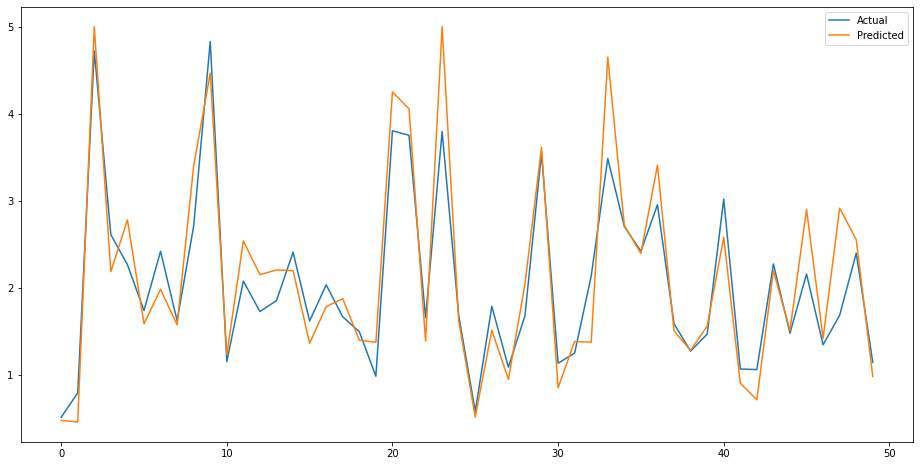

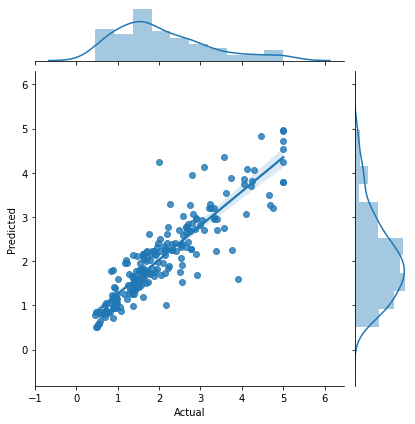

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# データセットの準備
y_pred = test_pdf["MedHouseVal_predicted"]
test = pd.DataFrame({"Predicted":y_pred,"Actual":y_test})
test = test.reset_index()
test = test.drop(["index"], axis=1)

# グラフのプロット
fig= plt.figure(figsize=(16,8))
plt.plot(test[:50])
plt.legend(["Actual", "Predicted"])
sns.jointplot(x="Actual", y="Predicted", data=test, kind="reg");